<a href="https://colab.research.google.com/github/Utsuk7/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url="/content/spam.csv"
import chardet
with open(url, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result
df= pd.read_csv(url,encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [9]:
df.sample(10)

,target,text
1639,spam,FreeMsg:Feelin kinda lnly hope u like 2 keep m...
4756,ham,"hey, looks like I was wrong and one of the kap..."
2997,ham,No b4 Thursday
1012,ham,I dunno they close oredi not... ÌÏ v ma fan...
1969,spam,You have won a guaranteed å£200 award or even ...
1405,ham,K..k..any special today?
5183,ham,"Fuuuuck I need to stop sleepin, sup"
4852,ham,I'm fine. Hope you are also
1494,ham,It has everything to do with the weather. Keep...
1057,ham,Ard 515 like dat. Y?


In [10]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()

In [11]:
df['target']=encoding.fit_transform(df['target'])

In [12]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Mandatory Steps

In [13]:
df.isnull().sum()

,0
target,0
text,0


In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

# EDA

In [17]:
# check percentage of data which is spam and ham respectively
df['target'].value_counts()

,count
target,
0,4516
1,653


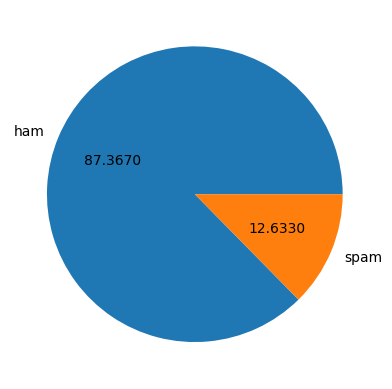

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%.4f")
plt.show() #data is imbalance

In [19]:
import nltk

In [20]:
df['len_characters']=df['text'].apply(len)
df.head()

,target,text,len_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
df['len_word']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,len_characters,len_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df[['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target']==0][['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target']==1][['len_characters','len_word','num_sentences']].describe()

,len_characters,len_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='len_characters', ylabel='Count'>

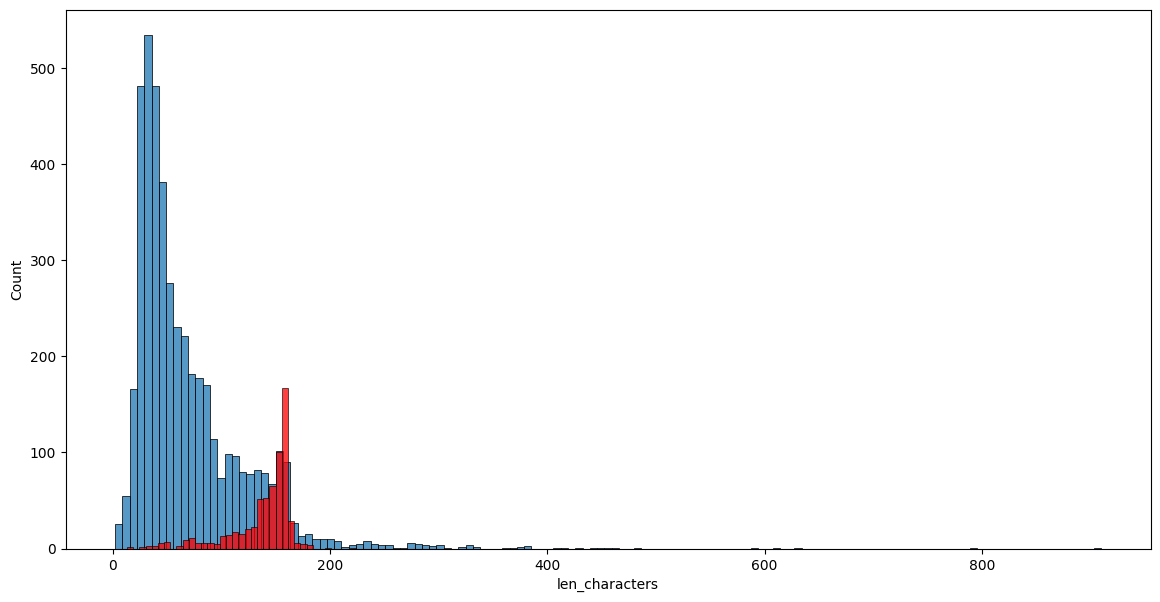

In [30]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['len_characters'])
sns.histplot(df[df['target']==1]['len_characters'],color='r')

<Axes: xlabel='len_word', ylabel='Count'>

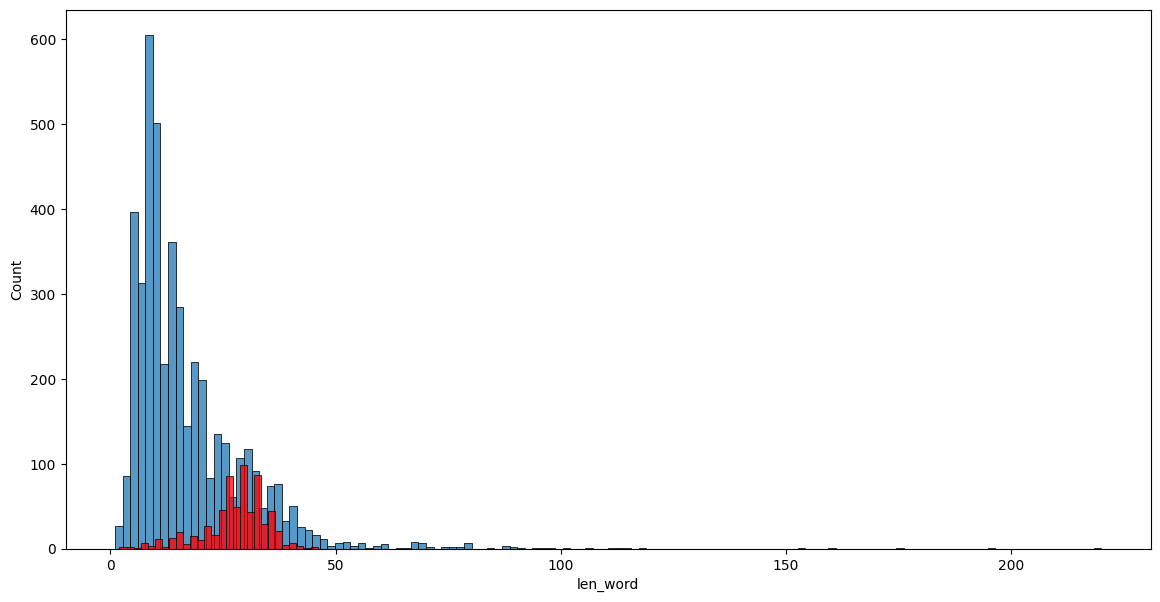

In [31]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target']==0]['len_word'])
sns.histplot(df[df['target']==1]['len_word'],color='r')

<Axes: xlabel='num_sentences', ylabel='Count'>

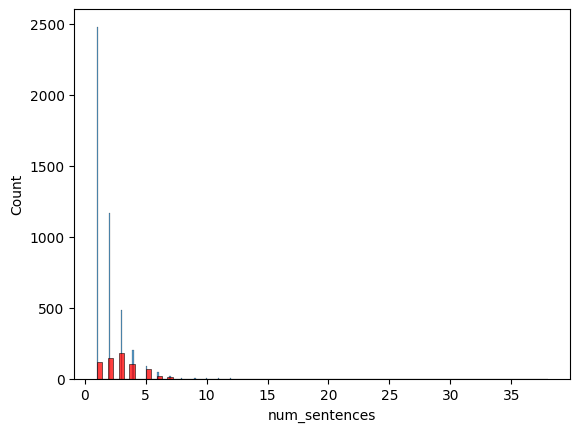

In [32]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='r')

<Axes: >

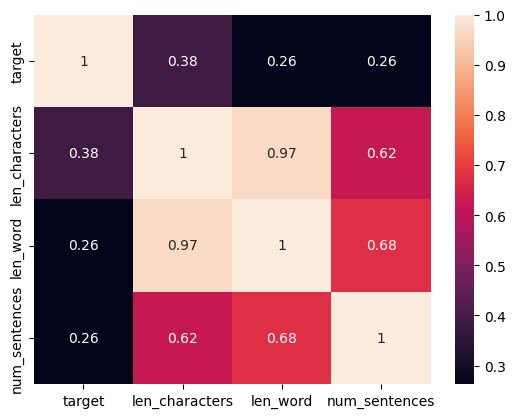

In [34]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

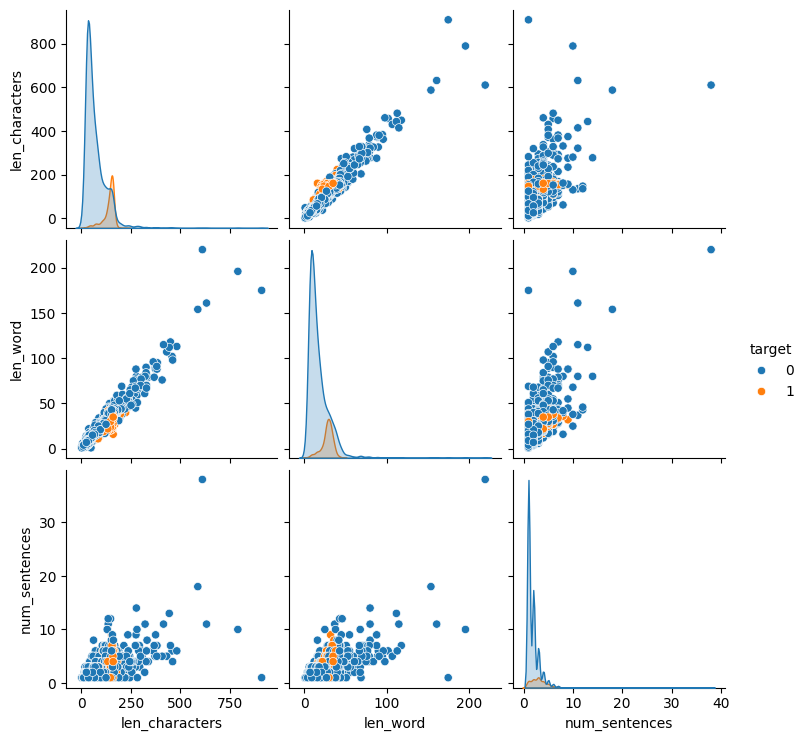

In [35]:
sns.pairplot(df,hue='target')
plt.show()

#Preprocessing

In [36]:
'''
lower case
tokenisation
special characters
removing stop words and punctuation
stemming
'''

'\nlower case\ntokenisation\nspecial characters\nremoving stop words and punctuation\nstemming\n'

In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
ps=PorterStemmer()
#ps.stem("playing")

In [39]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  ans=[]

  for i in text:
    if i.isalnum():
      ans.append(i)

  text=ans[:]
  ans.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      ans.append(i)

  text=ans[:]
  ans.clear()
  for i in text:
    ans.append(ps.stem(i))

  return " ".join(ans)


In [40]:
#transform_text("I love playing football. i play center forward")

In [41]:
df['preprocessed_text']=df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,len_characters,len_word,num_sentences,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')

In [44]:
# extracting most frequent words from spam messages
spam_wc=wc.generate(df[df['target']==1]['preprocessed_text'].str.cat(sep=' '))

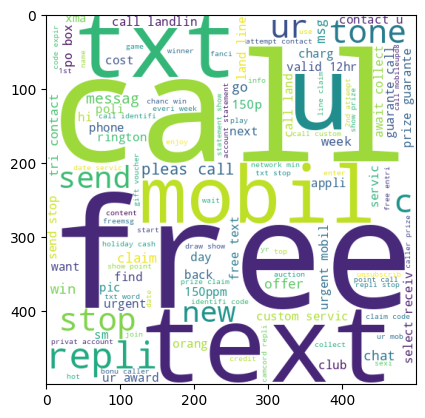

In [45]:
plt.imshow(spam_wc)

In [46]:
# extracting most frequent words from ham message
ham_wc=wc.generate(df[df['target']==0]['preprocessed_text'].str.cat(sep=" "))

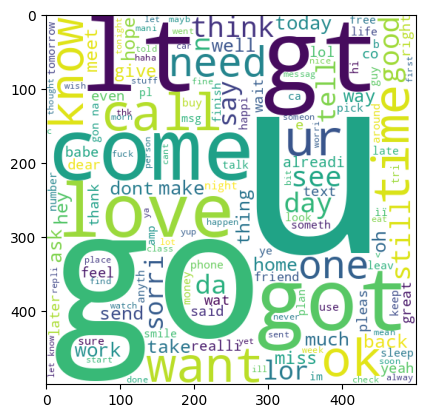

In [47]:
plt.imshow(ham_wc)

In [48]:
# count of top 30 most repeated words
freq_spam=[]
for msg in df[df['target']==1]['preprocessed_text'].to_list():
  for word in msg.split():
      freq_spam.append(word)


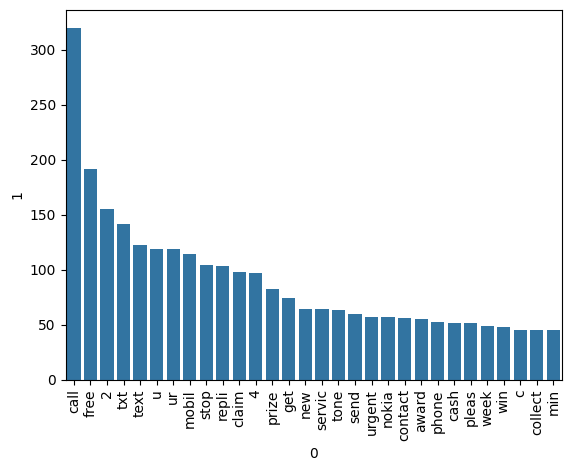

In [49]:
from collections import Counter
sns.barplot(data=pd.DataFrame(Counter(freq_spam).most_common(30)),x=pd.DataFrame(Counter(freq_spam).most_common(30))[0],y=pd.DataFrame(Counter(freq_spam).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
# count of top 30 most repeated words from ham

freq_ham=[]
for msg in df[df['target']==0]['preprocessed_text'].to_list():
  for word in msg.split():
      freq_ham.append(word)


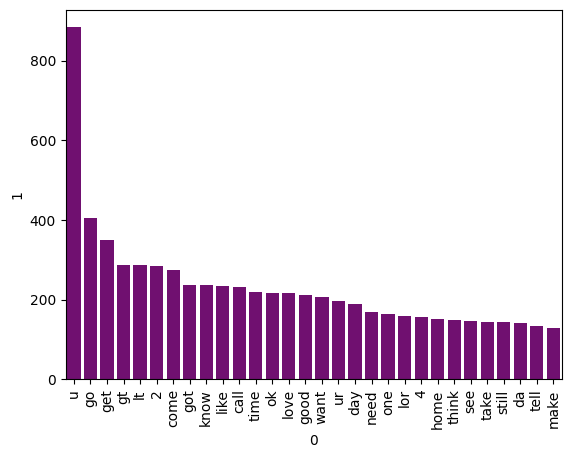

In [51]:
from collections import Counter
sns.barplot(data=pd.DataFrame(Counter(freq_ham).most_common(30)),x=pd.DataFrame(Counter(freq_ham).most_common(30))[0],y=pd.DataFrame(Counter(freq_ham).most_common(30))[1],color='purple')
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df.head()

,target,text,len_characters,len_word,num_sentences,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()

In [54]:
X=cv.fit_transform(df['preprocessed_text']).toarray()

In [55]:
X.shape

(5169, 6708)

In [56]:
y=df['target'].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [61]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [62]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [63]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [64]:
#TfidVectorisation
tfid=TfidfVectorizer(max_features=3000)

In [65]:
X=tfid.fit_transform(df['preprocessed_text']).toarray()

In [66]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [70]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [71]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [72]:
#tfid ---->mnb

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [74]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bgc=BaggingClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [75]:
column={
    'SVC':svc,
    'LRC':lrc,
    'KNC':knc,
    'MNB':mnb,
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'BGC':bgc,
    'GBC':gbc,
    'ETC':etc,
    'XBG':xgb
}

In [76]:
def train_performance(algo,X_train,y_train,X_test,y_test):
  algo.fit(X_train,y_train)
  y_pred=algo.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [77]:
accuracy_array=[]
precision_array=[]

for names,algo in column.items():
  accuracy,precision=train_performance(algo,X_train,y_train,X_test,y_test)
  print(names)
  print(accuracy)
  print(precision)

  accuracy_array.append(accuracy)
  precision_array.append(precision)

SVC
0.9758220502901354
0.9747899159663865
LRC
0.9584139264990329
0.9702970297029703
KNC
0.9052224371373307
1.0
MNB
0.9709864603481625
1.0
DTC
0.9294003868471954
0.8282828282828283
RFC
0.9758220502901354
0.9829059829059829


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ABC
0.960348162475822
0.9292035398230089
BGC
0.9584139264990329
0.8682170542635659
GBC
0.9468085106382979
0.9191919191919192
ETC
0.9748549323017408
0.9745762711864406
XBG
0.9671179883945842
0.9262295081967213


In [78]:
pred_df=pd.DataFrame({'Algorithms':column.keys(),'Accuracy':accuracy_array,'Precision':precision_array}).sort_values('Precision',ascending=False)
pred_df
temp_df=pd.DataFrame({'Algorithms':column.keys(),'Accuracy_3k_f':accuracy_array,'Precision_3k_f':precision_array}).sort_values('Precision_3k_f',ascending=False)

In [79]:
pred_df.merge(temp_df,on='Algorithms')

,Algorithms,Accuracy,Precision,Accuracy_3k_f,Precision_3k_f
0,KNC,0.905222,1.000000,0.905222,1.000000
1,MNB,0.970986,1.000000,0.970986,1.000000
2,RFC,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LRC,0.958414,0.970297,0.958414,0.970297
6,ABC,0.960348,0.929204,0.960348,0.929204
7,XBG,0.967118,0.926230,0.967118,0.926230
8,GBC,0.946809,0.919192,0.946809,0.919192
9,BGC,0.958414,0.868217,0.958414,0.868217


In [80]:
from sklearn.ensemble import VotingClassifier

In [81]:
voting=VotingClassifier(estimators=[('KNC',knc),('MNB',mnb),('RFC',rfc)],voting='soft')

In [82]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('KNC', KNeighborsClassifier()),
                             ('MNB', MultinomialNB()),
                             ('RFC',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [83]:
pred_voting=voting.predict(X_test)

In [84]:
print('Accuracy score',accuracy_score(y_test,pred_voting))
print('Precsion score',precision_score(y_test,pred_voting))

Accuracy score 0.9535783365570599
Precsion score 1.0


In [85]:
from sklearn.ensemble import StackingClassifier
estimators=[('KNC',knc),('MNB',mnb),('RFC',rfc)]
final_estimators=RandomForestClassifier()
stackclass=StackingClassifier(estimators=estimators,final_estimator=final_estimators)

In [86]:
stackclass.fit(X_train,y_train)
pred_stack=stackclass.predict(X_test)
print('Accuracy score',accuracy_score(y_test,pred_stack))
print('Precsion score',precision_score(y_test,pred_stack))

Accuracy score 0.9729206963249516
Precsion score 0.9230769230769231


In [88]:
#creating pipeline
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))